##### Imports

In [32]:
import sys
sys.path.append('../') # to import from previous dir folders

import gymnasium as gym
import random

# importing functions from utils
from helpers.loggers import logger
import helpers.utils as utils
import helpers.agents as agents

# To allow auto reload to this notebook after modifying any external file imported
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
env = gym.make("Taxi-v3", render_mode="ansi")

# seed random generators and the environment to replicate results
utils.seed(42, env)

In [34]:
n_episodes = agents.Value(data=10000, label='n_Episodes')
agent = agents.QLearningAgent(env, epsilon = 0.1, n_episodes = n_episodes.data)

In [35]:
# # For plotting metrics
# epochs_per_episode = []
# penalties_per_episode = []


# for episode in range(n_episodes.data):
#     # defining and keeping track of values
#     penalties = agents.Value(data=0, label='penalties')
#     total_rewards = agents.Value(data=0, label='penalties')    
#     epochs = agents.Value(data=0, label='epochs')
    
#     # both terminated, truncated are returned on every step
#     terminated, truncated = False, False
    
#     # reset the environment
#     obs, info = env.reset() # obs, info

#     # training loop
#     while not ((terminated) or (truncated)):
#         # get the action value
#         action = agent.get_action(obs)

#         # take a step towards the solution
#         next_obs, reward, terminated, truncated, info = env.step(action)

#         # update the agent parameters
#         agent.update_q_table(obs, action, reward, next_obs)
    
#         # keep track of values
#         total_rewards += reward
#         if reward == -10:
#             penalties += reward #1
        
#         epochs += 1
#         obs = next_obs # update the next state
    
#     epochs_per_episode.append(epochs.data)
#     penalties_per_episode.append(penalties.data)

In [36]:
epochs_per_episode, penalties_per_episode = agent.train()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:18<00:00, 527.93it/s]


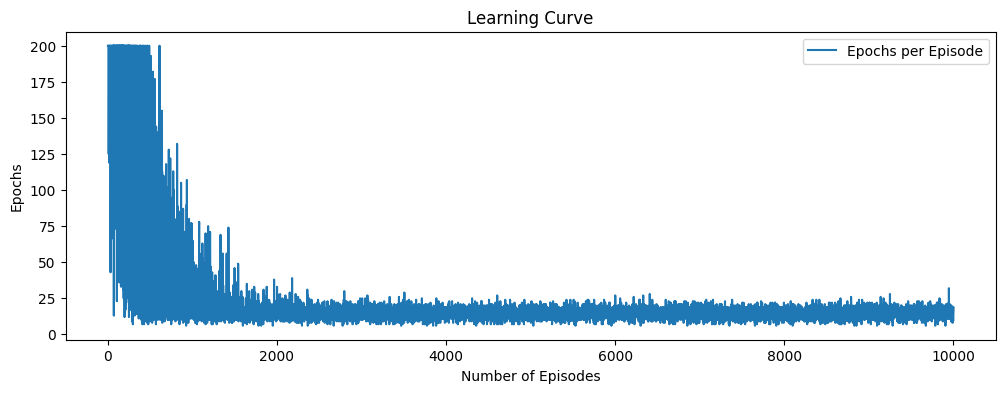

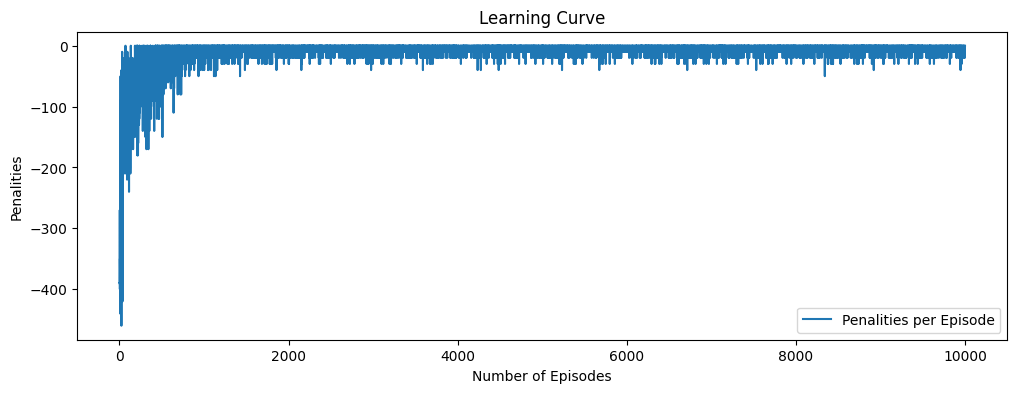

In [37]:
utils.plot_learning(list(range(1, n_episodes.data + 1)), epochs_per_episode, legend_title='Epochs per Episode', ylabel='Epochs')
utils.plot_learning(list(range(1, n_episodes.data + 1)), penalties_per_episode, legend_title='Penalities per Episode', ylabel='Penalities')

#### Let's test visually!

In [38]:
agent.test()

Step 0: [3, 0, 3, 2], Reward: 0
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Step 1: [2, 0, 3, 2], Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Step 2: [2, 1, 3, 2], Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Step 3: [2, 2, 3, 2], Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Step 4: [2, 3, 3, 2], Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Step 5: [3, 3, 3, 2], Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step 6: [4, 3, 3, 2], Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step 7: [4, 3, 4, 2], Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


In very few epochs/steps, it sucessfully performs the task.